## ALGORITMO SVM - CLASIFICADOR

### Importamos librerías necesarias

In [4]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt


### Generamos sintéticamente nuestro dataset

Nuestra variable de salida (variable **y**) va a disponer de 2 clases

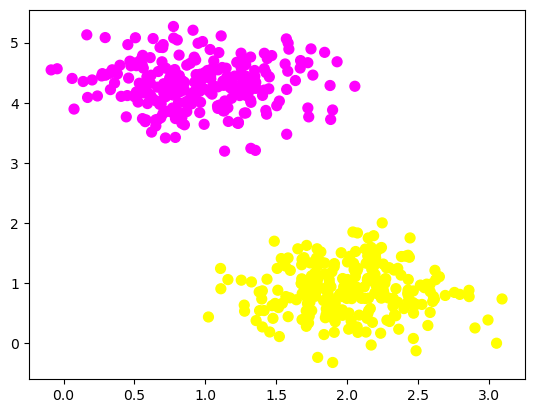

In [2]:
X, y = make_blobs(n_samples=500, centers=2,
				random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt
# plotting scatters 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');
plt.show() 

Lo que hace el algoritmo SVM no es sólo trazar una línea entre dos clases, sino considerar una región alrededor de la línea de una anchura determinada. He aquí un ejemplo de lo que puede parecer:

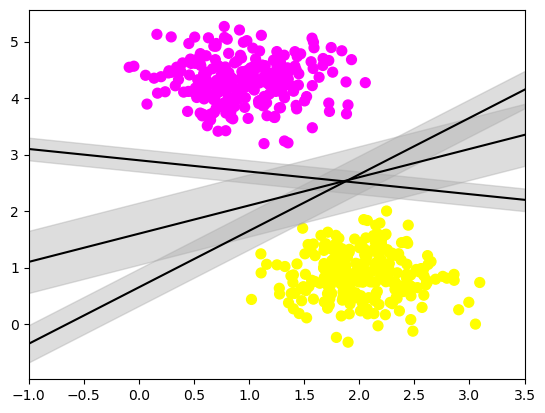

In [5]:
# creating linspace between -1 to 3.5 
xfit = np.linspace(-1, 3.5)

# plotting scatter
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')

# plot a line between the different sets of data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
	yfit = m * xfit + b
	plt.plot(xfit, yfit, '-k')
	plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', 
	color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)
plt.show()


Este es el comportamiento del SVM, que optimizan un modelo discriminante lineal que representa la distancia perpendicular entre los conjuntos de datos.

Pasamos a trabajar, ahora sí, con un dataset sobre tipología oncológica (benigno, maligno)

Importamos librerías

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Cargamos el dataset

In [41]:
df = pd.read_csv("./datasets/cancer.csv")

Recodificamos la clase: 1 para tipo maligno y 0 para tipo benigno

In [42]:
from sklearn.preprocessing import LabelEncoder

LEncoder = LabelEncoder()

df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])

Extraemos las características y la clase de salida. (X e y)

In [43]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

In [45]:
print(X.shape)
print(y.shape)

(569, 32)
(569,)


## Conjuntos de TRAIN y TEST

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [47]:
print(X_train.shape)
print(y_train.shape)

(455, 32)
(455,)


Escalado de características

In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

E:\Users\Jordi\anaconda3\envs\ceiadb\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
E:\Users\Jordi\anaconda3\envs\ceiadb\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
E:\Users\Jordi\anaconda3\envs\ceiadb\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [49]:
print(X_train.shape)
print(y_train.shape)

(455, 32)
(455,)


## Construcción y entrenamiento del modelo

In [51]:
X_train = np.delete(X_train,31,axis=1)


In [52]:
print(X_train.shape)

(455, 31)


In [56]:
X_test = np.delete(X_test,31,axis=1)

In [57]:
from sklearn.svm import SVC

svc = SVC(probability=True)

svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)

## Evaluación del modelo

In [59]:
print("Accuracy del modelo: ", svc.score(X_test,y_test))

Accuracy del modelo:  0.9824561403508771


In [61]:
from sklearn.metrics import confusion_matrix

cm = np.array(confusion_matrix(y_test, y_pred_svc, labels=[1,0]))

confusion_mat= pd.DataFrame(cm, index = ['cancer', 'sano'],
                           columns =['predicción_cancer','predicción_sano'])

confusion_mat

,predicción_cancer,predicción_sano
cancer,41,2
sano,0,71


Como podemos ver en la tabla anterior

- Verdadero Positivo(TP) : Valores que el modelo predijo como sí (prediccion_sano), y es realmente sí (sano).
- Verdadero Negativo(TN) : Valores que el modelo predijo como no (predicción_cancer), y en realidad es no (cáncer).
- Falso Positivo(FP): Valores que el modelo predijo como sí (prediccion_sano), y en realidad es no (cáncer).
- Falso negativo (FN): Valores que el modelo predijo como no (predicción_cancer), pero que en realidad son sí (sano).

En este conjunto de datos, cuando el modelo predice algo como sí, indica ausencia de células cancerosas (sano) y cuando el modelo predice no, indica existencia de células cancerosas (cáncer).

La **precisión** es la relación entre las observaciones positivas predichas correctamente y el total de observaciones positivas predichas.

In [62]:
from sklearn.metrics import precision_score

print("Precision: ", precision_score(y_test, y_pred_svc))

Precision:  1.0


**Recall** (Sensibilidad), es la proporción de casos positivos detectados correctamente por el clasificador respecto al total de observaciones de la clase real

In [64]:
from sklearn.metrics import recall_score

print("Recall: ", recall_score(y_test, y_pred_svc))

Recall:  0.9534883720930233


### Classification Report

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svc))

Classification Report:                precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114
